# First Order Exponentialy Weighted Fuzzy Time Series by Sadaei et al. (2013)

H. J. Sadaei, R. Enayatifar, A. H. Abdullah, and A. Gani, “Short-term load forecasting using a hybrid model with a 
refined exponentially weighted fuzzy time series and an improved harmony search,” Int. J. Electr. Power Energy Syst., vol. 62, no. from 2005, pp. 118–129, 2014.


# Common Imports

In [3]:
import matplotlib.pylab as plt
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.models import sadaei

from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data Loading

In [4]:
from pyFTS.data import Enrollments

enrollments = Enrollments.get_data()

# Exploring the partitioning effects on original data

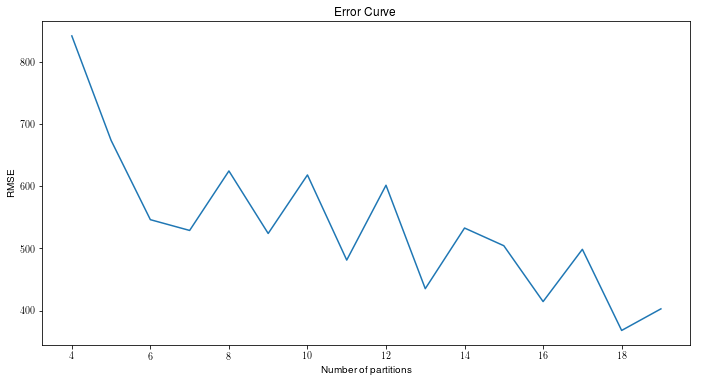

In [5]:
# Parameter c = 1.1
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, sadaei.ExponentialyWeightedFTS, 
                              range(4,20), [1], tam=[10, 5], parameters=1.1)

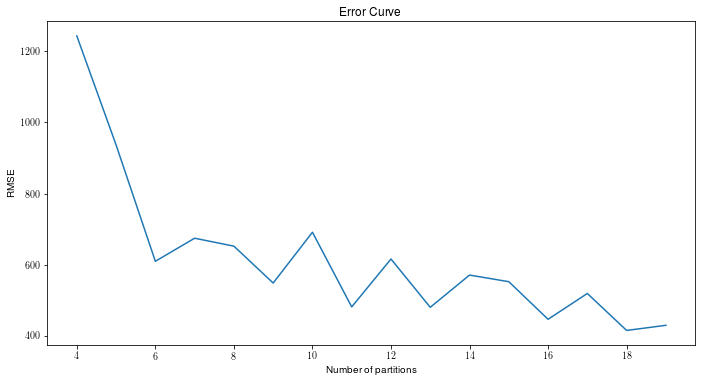

In [6]:
# Parameter c = 2
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, sadaei.ExponentialyWeightedFTS, 
                              range(4,20), [1], tam=[10, 5], parameters=2.0)

# Exploring the partitioning effects on transformed data

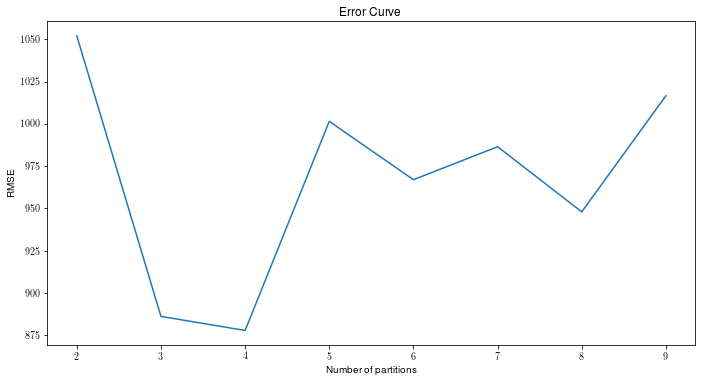

In [7]:
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, sadaei.ExponentialyWeightedFTS, 
                              range(2,10), [1], transformation=tdiff, tam=[10, 5], parameters=1.1)

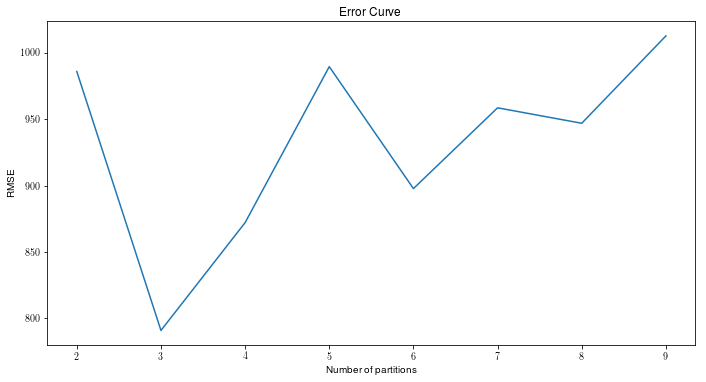

In [9]:
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, sadaei.ExponentialyWeightedFTS, 
                              range(2,10), [1], transformation=tdiff, tam=[10, 5], parameters=2)

# Comparing the partitioning schemas

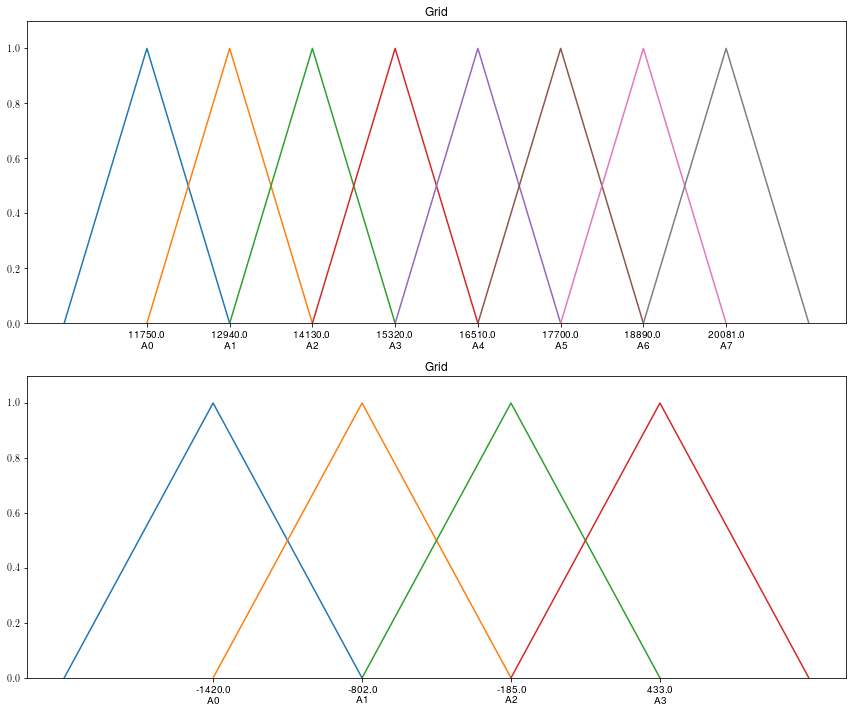

In [10]:
from pyFTS.partitioners import Grid, Util as pUtil

fuzzy_sets = Grid.GridPartitioner(data=enrollments, npart=8)
fuzzy_sets2 = Grid.GridPartitioner(data=enrollments, npart=4, transformation=tdiff)

pUtil.plot_partitioners(enrollments, [fuzzy_sets,fuzzy_sets2])

# Fitting a model on original data

In [11]:
model1 = sadaei.ExponentialyWeightedFTS("FTS", partitioner=fuzzy_sets, c=1.1)
model1.fit(enrollments)

print(model1)

[ 17:00:44] Start training
[ 17:00:44] Finish training
Exponentialy Weighted FTS:
A1 -> A2(1.0)
A2 -> A2(0.30211480362537757),A2(0.33232628398791536),A3(0.36555891238670696)
A3 -> A3(0.08744401757481343),A3(0.09618841933229477),A3(0.10580726126552426),A3(0.1163879873920767),A3(0.12802678613128438),A3(0.14082946474441282),A4(0.15491241121885413),A4(0.17040365234073956)
A4 -> A3(0.16379748079474535),A4(0.18017722887421989),A4(0.1981949517616419),A4(0.2180144469378061),A5(0.23981589163158673)
A5 -> A6(1.0)
A6 -> A6(0.30211480362537757),A6(0.33232628398791536),A6(0.36555891238670696)



# Fitting a model on transformed data

In [12]:
model2 = sadaei.ExponentialyWeightedFTS("FTS Diff", partitioner=fuzzy_sets2, c=1.1)
model2.append_transformation(tdiff)
model2.fit(enrollments)

print(model2)

[ 17:00:51] Start training
[ 17:00:51] Finish training
Exponentialy Weighted FTS:
A0 -> A1(1.0)
A1 -> A0(0.10540549970059566),A1(0.11594604967065524),A1(0.12754065463772077),A2(0.14029472010149285),A2(0.15432419211164214),A2(0.16975661132280637),A3(0.18673227245508703)
A2 -> A1(0.07364053907434345),A1(0.08100459298177781),A1(0.08910505227995559),A1(0.09801555750795117),A2(0.10781711325874628),A2(0.11859882458462091),A3(0.13045870704308302),A3(0.14350457774739134),A3(0.1578550355221305)
A3 -> A2(0.21547080370609778),A2(0.23701788407670757),A2(0.26071967248437833),A3(0.28679163973281624)



# Using the models

In [13]:
model1.predict(enrollments)

[14129.8,
 14564.869939577038,
 14564.869939577038,
 14564.869939577038,
 15661.27507002801,
 15661.27507002801,
 15661.27507002801,
 15661.27507002801,
 16559.635161586215,
 16559.635161586215,
 16559.635161586215,
 15661.27507002801,
 15661.27507002801,
 15661.27507002801,
 15661.27507002801,
 16559.635161586215,
 16559.635161586215,
 18890.399999999998,
 18890.399999999994,
 18890.399999999994,
 18890.399999999994,
 18890.399999999994]

In [14]:
model2.predict(enrollments)

[12870.91127138479,
 13080.342728533089,
 13682.91127138479,
 14213.342728533089,
 14977.342728533089,
 15272.594096099978,
 15418.91127138479,
 15676.91127138479,
 16324.342728533089,
 16734.91127138479,
 16349.594096099978,
 15394.594096099978,
 15312.91127138479,
 15106.594096099978,
 14978.91127138479,
 15501.342728533089,
 16376.342728533089,
 17347.55,
 18487.34272853309,
 19143.91127138479,
 19152.91127138479,
 18837.59409609998]

# Comparing the models

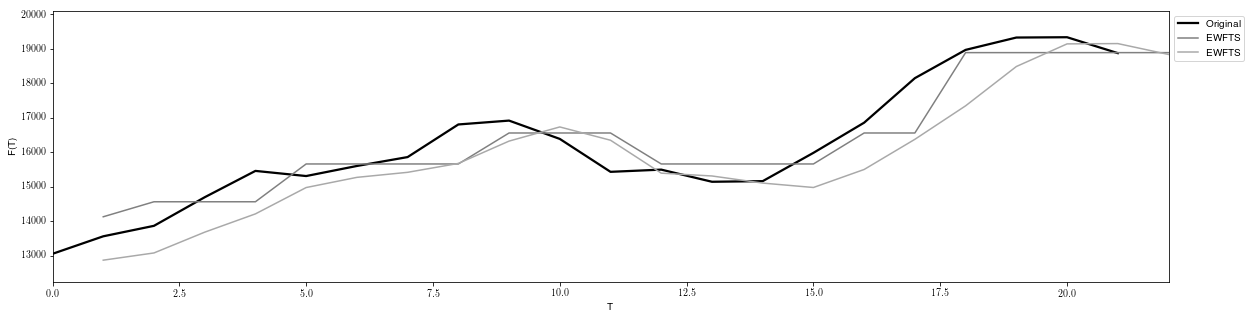

In [15]:
bchmk.plot_compared_series(enrollments, [model1, model2], bchmk.colors, intervals=False)

In [16]:
bchmk.print_point_statistics(enrollments, [model1, model2])

Model		& Order     & RMSE		& SMAPE      & Theil's U		\\ 
EWFTS		& 1		& 624.71		& 1.5		& 1.02	\\ 
EWFTS		& 1		& 877.76		& 2.27		& 1.43	\\ 



# Residual Analysis

In [ ]:
from pyFTS.benchmarks import ResidualAnalysis as ra

ra.plot_residuals(enrollments, [model1, model2])